In [2]:
import asyncio
import websockets
import json
import pandas as pd
import nest_asyncio
import matplotlib.pyplot as plt
nest_asyncio.apply()
import warnings
import numpy as np
import datetime
from utils import collect_all_instruments_ids, collect_single_instrument_data
warnings.filterwarnings("ignore")

## Соберем все id-щники и опционы, которым они соответсвуют

In [6]:
# все id-шники
instruments_df = collect_all_instruments_ids()
instruments_df.head(5)

,instrument_name,instrument_id
0,BTC-23OCT22-15000-C,140054
1,BTC-23OCT22-15000-P,140055
2,BTC-23OCT22-16000-C,140056
3,BTC-23OCT22-16000-P,140057
4,BTC-23OCT22-17000-C,140058


## Собираем данные по конкретному опциону

In [4]:
# по конкретному опциону
single_option = collect_single_instrument_data(instrument_id = 140054, number_of_ticks = 100)
single_option.head(5)

2022-10-22 21:06:03.603 | INFO     | utils:call_api:68 - Collected 100 ticks for id = 140054


,instrument_name,timestamp,underlying_price,mark_iv,mark_price,best_bid_price,best_ask_price,human_timestamp,strike
0,BTC-23OCT22-15000-C,1666461955380,19148.8979,210.0,0.2167,0.0,0.0,2022-10-22 21:05:55.380000,15000
5,BTC-23OCT22-15000-C,1666461956389,19149.0563,210.0,0.2167,0.0,0.0,2022-10-22 21:05:56.389000,15000
18,BTC-23OCT22-15000-C,1666461957394,19149.3825,210.0,0.2167,0.0,0.0,2022-10-22 21:05:57.394000,15000
31,BTC-23OCT22-15000-C,1666461958399,19149.2187,210.0,0.2167,0.0,0.0,2022-10-22 21:05:58.399000,15000
45,BTC-23OCT22-15000-C,1666461959407,19149.1550,210.0,0.2167,0.0,0.0,2022-10-22 21:05:59.407000,15000


2022-10-23 00:47:18.448 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132634
2022-10-23 00:47:18.879 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132635
2022-10-23 00:47:19.290 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132636
2022-10-23 00:47:19.697 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132637
2022-10-23 00:47:20.104 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132638
2022-10-23 00:47:20.525 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132639
2022-10-23 00:47:20.937 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132640
2022-10-23 00:47:21.364 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132641
2022-10-23 00:47:21.770 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132642
2022-10-23 00:47:22.202 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132643
2022-10-23 00:47:22.623 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 132644

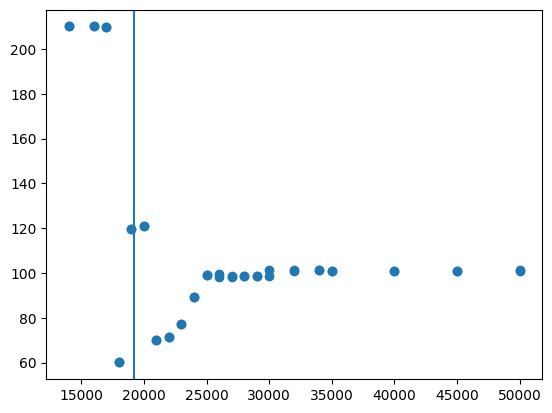

In [20]:
random_instrument = instruments_df.sample(1).iloc[0]["instrument_name"]
single_strike = instruments_df[
    (instruments_df["instrument_name"].str.startswith(random_instrument[0:11])) 
#     (instruments_df["instrument_name"].str.endswith(random_instrument[-1]))
]
single_strike_ids = single_strike.instrument_id.to_list()


options = []
for op_id in single_strike_ids:
    option = collect_single_instrument_data(instrument_id = op_id, number_of_ticks = 1)
#     print(option)
    options.append(option)
    
ivs = []
strikes = []
for option in options:
    ivs.append(option.iloc[0]["mark_iv"])
    strikes.append(option.iloc[0]["strike"])
    
    
df = pd.DataFrame({"strike": strikes, "iv": ivs})
plt.scatter(strikes, ivs)
plt.axvline(x=option.iloc[0]["underlying_price"])
plt.show()